# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [1]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import joblib

import warnings
warnings.filterwarnings('ignore')

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [2]:
# Load data
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [3]:
# Tampilkan 5 baris pertama dengan function head.
df.head(5)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [4]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [5]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

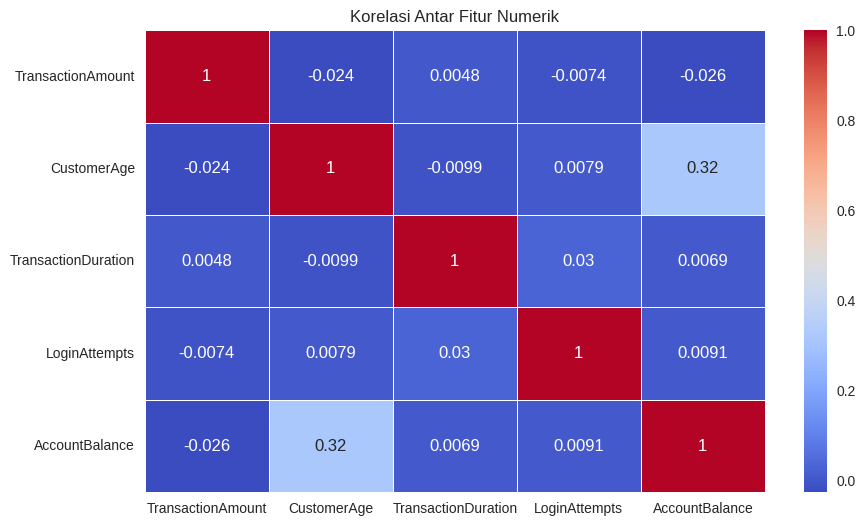

In [6]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Korelasi Antar Fitur Numerik")
plt.show()

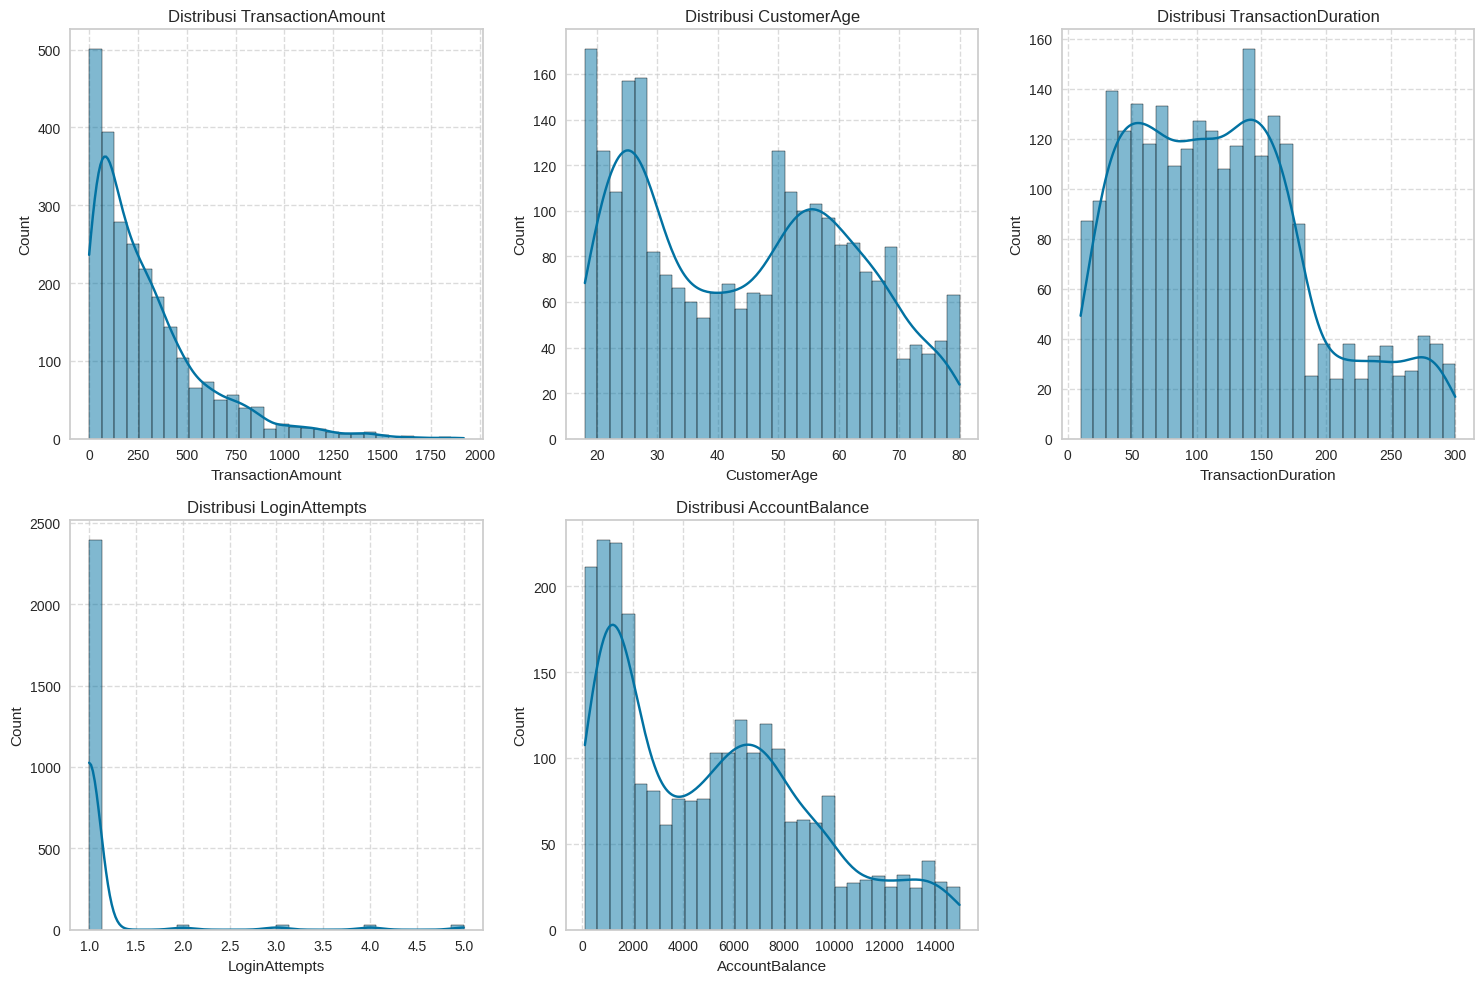

In [7]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col].dropna(), bins=30, kde=True, edgecolor='black')
    plt.title(f"Distribusi {col}")
    plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

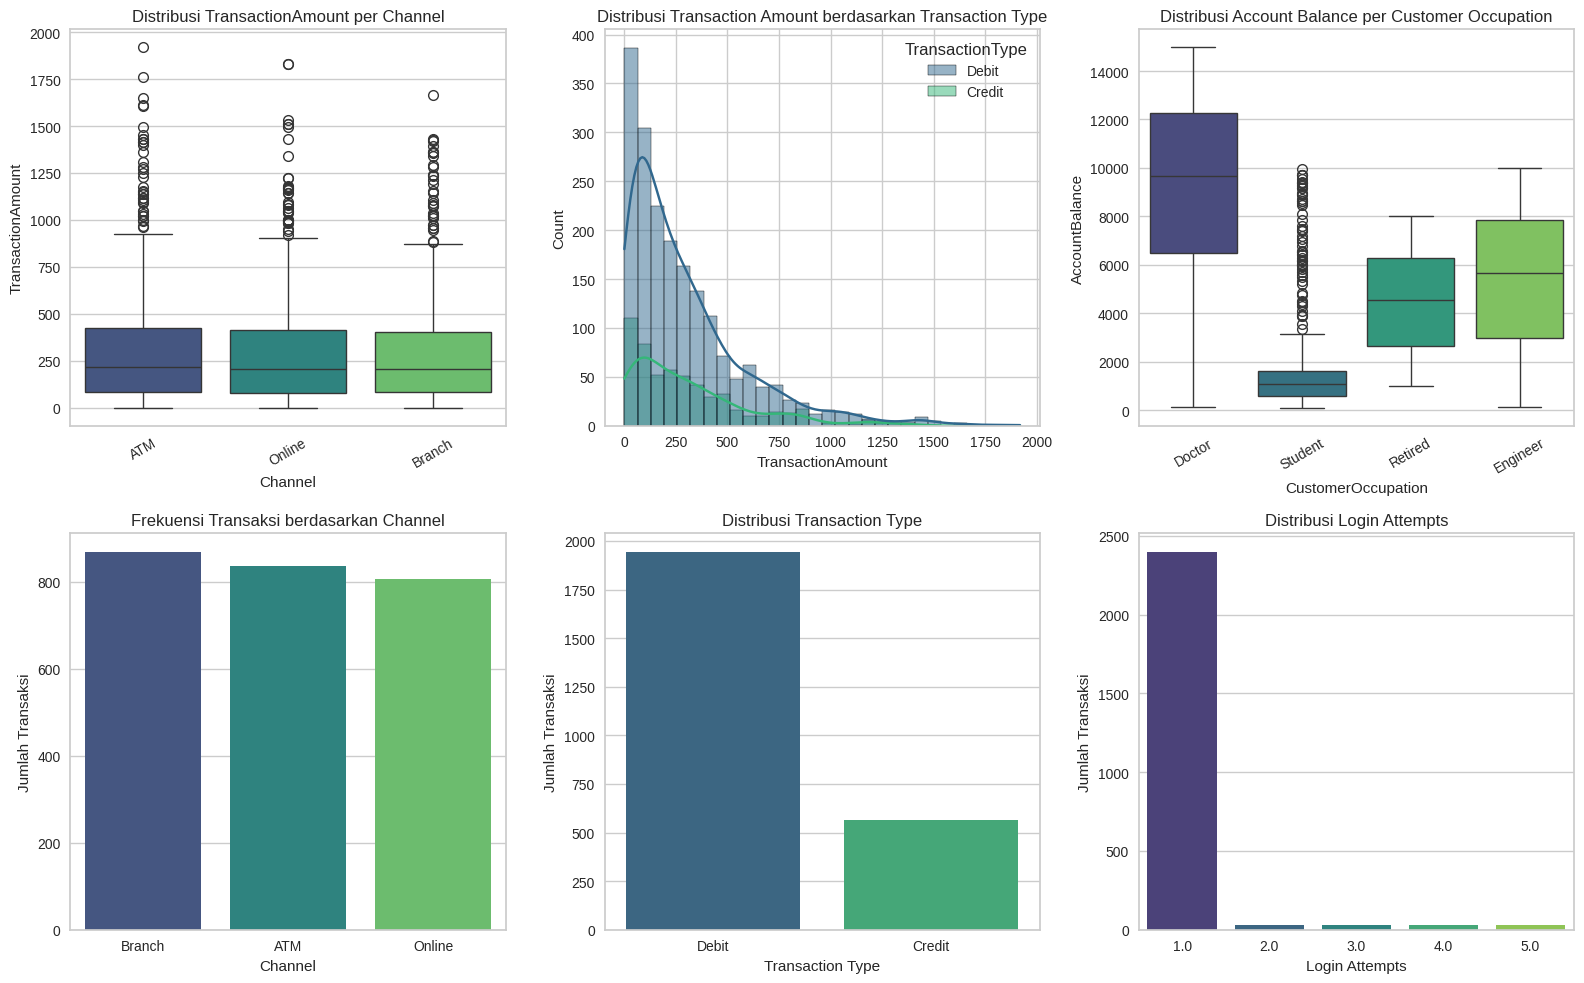

In [8]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
plt.figure(figsize=(16, 10))

# Boxplot TransactionAmount per Channel
plt.subplot(2, 3, 1)
sns.boxplot(data=df, x="Channel", y="TransactionAmount", palette="viridis")
plt.title("Distribusi TransactionAmount per Channel")
plt.xticks(rotation=30)

# Distribusi TransactionAmount per TransactionType
plt.subplot(2, 3, 2)
sns.histplot(data=df, x="TransactionAmount", hue="TransactionType", bins=30, kde=True,
             edgecolor='black', palette="viridis")
plt.title("Distribusi Transaction Amount berdasarkan Transaction Type")

# Boxplot AccountBalance per CustomerOccupation
plt.subplot(2, 3, 3)
sns.boxplot(data=df, x="CustomerOccupation", y="AccountBalance", palette="viridis")
plt.title("Distribusi Account Balance per Customer Occupation")
plt.xticks(rotation=30)

# Countplot Channel
plt.subplot(2, 3, 4)
sns.countplot(data=df, x="Channel", order=df["Channel"].value_counts().index, palette="viridis")
plt.title("Frekuensi Transaksi berdasarkan Channel")
plt.xlabel("Channel")
plt.ylabel("Jumlah Transaksi")

# Countplot TransactionType
plt.subplot(2, 3, 5)
sns.countplot(data=df, x="TransactionType", palette="viridis")
plt.title("Distribusi Transaction Type")
plt.xlabel("Transaction Type")
plt.ylabel("Jumlah Transaksi")

# Countplot LoginAttempts
plt.subplot(2, 3, 6)
sns.countplot(x='LoginAttempts', data=df, palette="viridis")
plt.title("Distribusi Login Attempts")
plt.xlabel("Login Attempts")
plt.ylabel("Jumlah Transaksi")

plt.tight_layout()
plt.show()

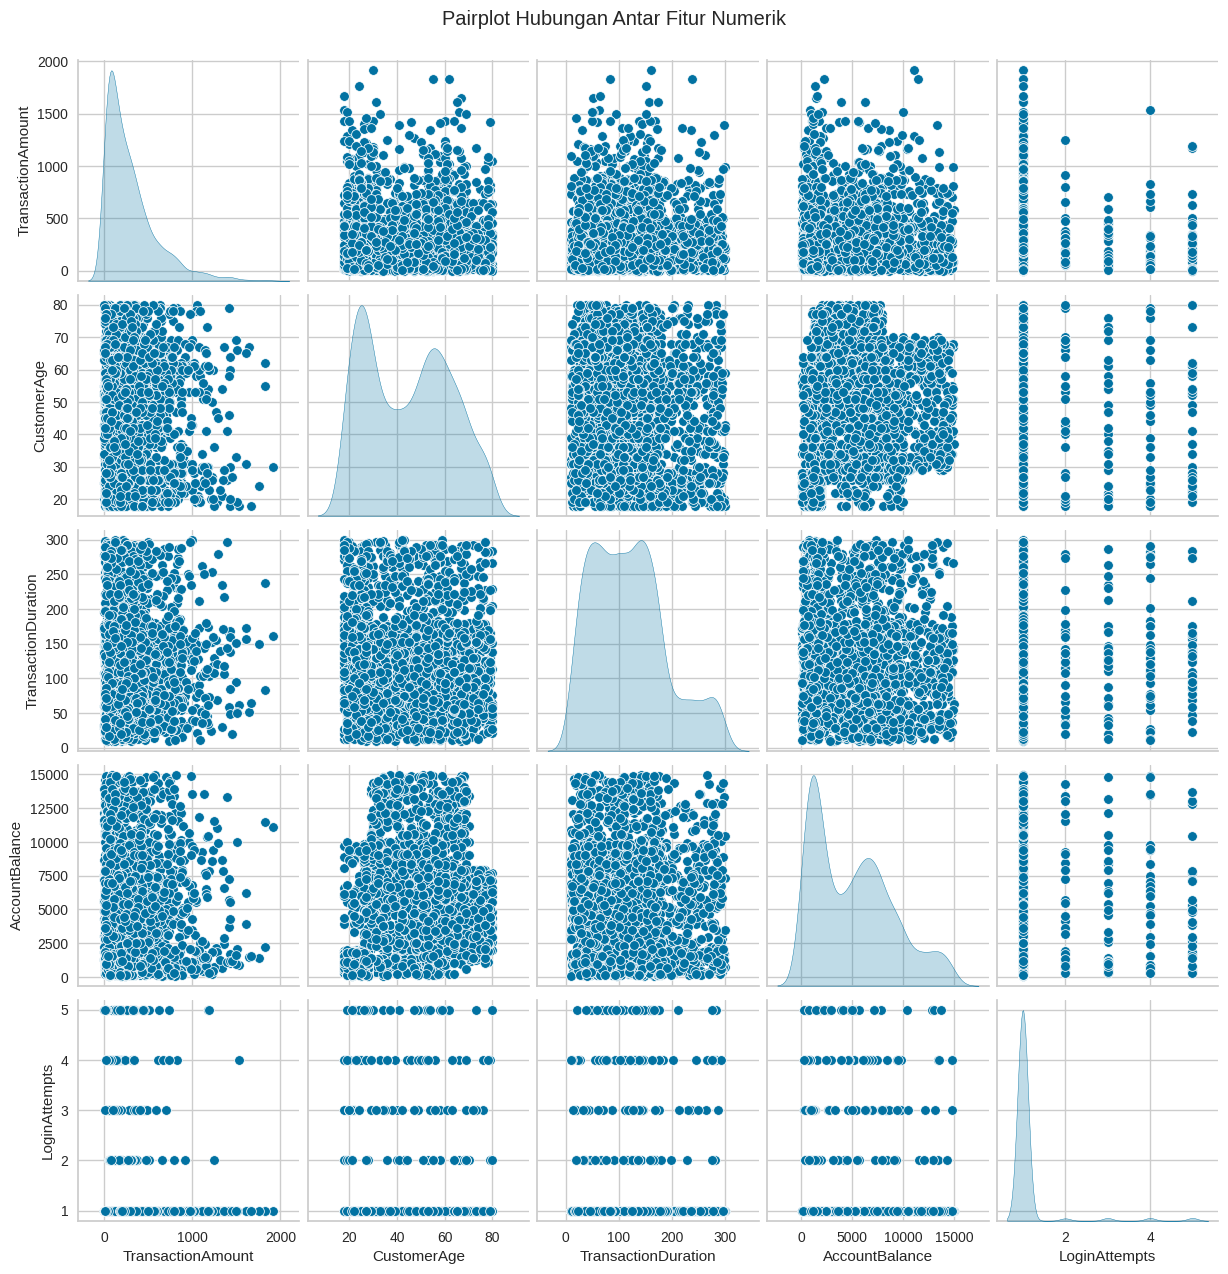

In [9]:
sns.pairplot(df[['TransactionAmount','CustomerAge','TransactionDuration','AccountBalance', 'LoginAttempts']], diag_kind='kde')
plt.suptitle("Pairplot Hubungan Antar Fitur Numerik", y=1.02)
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [10]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

,0
TransactionID,29
AccountID,21
TransactionAmount,26
TransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [11]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()

np.int64(21)

In [12]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.

# Konversi kolom waktu ke format datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'])

# Ekstraksi fitur waktu
df['TransactionHour'] = df['TransactionDate'].dt.hour
df['TransactionDay'] = df['TransactionDate'].dt.dayofweek
df['TransactionGap'] = (df['PreviousTransactionDate'] - df['TransactionDate']).dt.days

# Menghapus fitur datetime asli karena udah diekstraksi
df.drop(columns=['TransactionDate', 'PreviousTransactionDate'], inplace=True)

# Scaling dengan MinMaxScaler untuk semua fitur numerik
scaler = MinMaxScaler()
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = scaler.fit_transform(df[num_cols])

df.head()

,TransactionID,AccountID,TransactionAmount,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionHour,TransactionDay,TransactionGap
0,TX000001,AC00128,0.007207,Debit,San Diego,D000380,162.198.218.92,M015,ATM,0.838710,Doctor,0.244828,0.0,0.336832,0.0,0.25,0.728022
1,TX000002,AC00455,0.195940,Debit,Houston,D000051,13.149.61.4,M052,ATM,0.806452,Doctor,0.451724,0.0,0.918055,0.0,0.25,0.516484
2,TX000003,AC00019,0.065680,Debit,Mesa,D000235,215.97.143.157,M009,Online,0.016129,Student,0.158621,0.0,0.068637,1.0,0.00,0.480769
3,TX000004,AC00070,0.096016,Debit,Raleigh,D000187,200.13.225.150,M002,Online,0.129032,Student,0.051724,0.0,0.569198,0.0,1.00,0.662088
4,TX000005,AC00411,0.006874,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,0.648276,0.0,0.492591,0.5,0.00,0.211538


In [13]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
df = df.drop(columns=["TransactionID", "AccountID", "DeviceID", "MerchantID", "IP Address"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionAmount    2511 non-null   float64
 1   TransactionType      2507 non-null   object 
 2   Location             2507 non-null   object 
 3   Channel              2510 non-null   object 
 4   CustomerAge          2519 non-null   float64
 5   CustomerOccupation   2514 non-null   object 
 6   TransactionDuration  2511 non-null   float64
 7   LoginAttempts        2516 non-null   float64
 8   AccountBalance       2510 non-null   float64
 9   TransactionHour      2509 non-null   float64
 10  TransactionDay       2509 non-null   float64
 11  TransactionGap       2485 non-null   float64
dtypes: float64(8), object(4)
memory usage: 238.0+ KB


In [14]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.
cat_cols = df.select_dtypes(include=['object']).columns
encoders = {}

"""
  menghapus missing value yang ada pada fitur kategorikal agar tidak ikut terLabelEncoder,
  agar datanya tidak bias
"""
df = df.dropna(subset=cat_cols)

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    encoders[col] = le   # simpan encoder per kolom

df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionHour,TransactionDay,TransactionGap
0,0.007207,1,36,0,0.838710,0,0.244828,0.0,0.336832,0.0,0.25,0.728022
1,0.195940,1,15,0,0.806452,0,0.451724,0.0,0.918055,0.0,0.25,0.516484
2,0.065680,1,23,2,0.016129,3,0.158621,0.0,0.068637,1.0,0.00,0.480769
3,0.096016,1,33,2,0.129032,3,0.051724,0.0,0.569198,0.0,1.00,0.662088
4,0.006874,0,1,2,NaN,3,0.648276,0.0,0.492591,0.5,0.00,0.211538


In [15]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
df.columns.tolist()

['TransactionAmount',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'TransactionHour',
 'TransactionDay',
 'TransactionGap']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [16]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
df = df.dropna()
df.isnull().sum()

,0
TransactionAmount,0
TransactionType,0
Location,0
Channel,0
CustomerAge,0
CustomerOccupation,0
TransactionDuration,0
LoginAttempts,0
AccountBalance,0
TransactionHour,0


In [17]:
# Menghapus data duplikat menggunakan drop_duplicates().
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [18]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
# Handling outlier dengan IQR pada TransactionAmount
Q1 = df['TransactionAmount'].quantile(0.25)
Q3 = df['TransactionAmount'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['TransactionAmount'] < (Q1 - 1.5 * IQR)) | (df['TransactionAmount'] > (Q3 + 1.5 * IQR)))]

In [19]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.
# Binning pada CustomerAge
bins = [0, 0.25, 0.40, 0.60, 1.00] # rentang 0-1 karena udah di normalisasi
labels = ["Muda", "Dewasa", "ParuhBaya", "Lansia"]
df['AgeGroup'] = pd.cut(df['CustomerAge'], bins=bins, labels=labels, right=True, include_lowest=True)

# Encode hasil binning
le_age = LabelEncoder()
df['AgeGroup'] = le_age.fit_transform(df['AgeGroup'].astype(str))

df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionHour,TransactionDay,TransactionGap,AgeGroup
0,0.007207,1,36,0,0.838710,0,0.244828,0.0,0.336832,0.0,0.25,0.728022,1
1,0.195940,1,15,0,0.806452,0,0.451724,0.0,0.918055,0.0,0.25,0.516484,1
2,0.065680,1,23,2,0.016129,3,0.158621,0.0,0.068637,1.0,0.00,0.480769,2
3,0.096016,1,33,2,0.129032,3,0.051724,0.0,0.569198,0.0,1.00,0.662088,2
5,0.047888,1,28,0,0.000000,3,0.558621,0.0,0.045738,0.5,0.00,0.750000,2


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [20]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
df.describe()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionHour,TransactionDay,TransactionGap,AgeGroup
count,2143.000000,2143.000000,2143.000000,2143.000000,2143.000000,2143.000000,2143.000000,2143.000000,2143.000000,2143.000000,2143.000000,2143.000000,2143.000000
mean,0.132648,0.772748,21.189454,0.984134,0.430343,1.506300,0.378350,0.030448,0.338506,0.310546,0.366542,0.498799,1.654690
std,0.112936,0.419154,12.279409,0.804823,0.287284,1.134648,0.244734,0.147261,0.262893,0.364497,0.380016,0.292792,0.929963
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000064,0.000000,0.000000,0.000000,0.000000
25%,0.040714,1.000000,11.000000,0.000000,0.145161,0.000000,0.182759,0.000000,0.094310,0.000000,0.000000,0.244505,1.000000
50%,0.102624,1.000000,21.000000,1.000000,0.435484,1.000000,0.348276,0.000000,0.312454,0.000000,0.250000,0.500000,2.000000
75%,0.193858,1.000000,32.000000,2.000000,0.661290,3.000000,0.524138,0.000000,0.511823,0.500000,0.750000,0.758242,2.000000
max,0.470558,1.000000,42.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


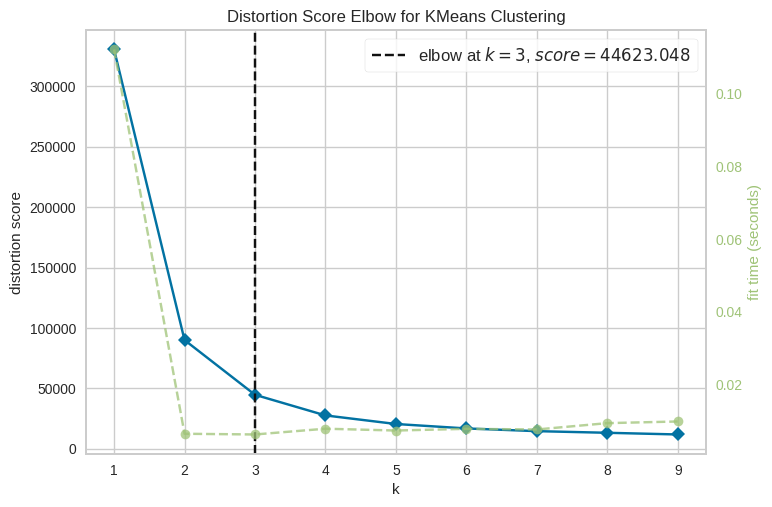

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
# Pilih hanya kolom numerik hasil preprocessing
X = df.select_dtypes(include=['float64','int64'])

# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(X)

# Menampilkan grafik elbow untuk analisis
visualizer.show()


In [22]:
# Menggunakan algoritma K-Means Clustering
model_kmeans = KMeans(n_clusters=3, random_state=42)  # n_clusters ganti sesuai hasil Elbow
model_kmeans.fit(df)
df["Cluster"] = model_kmeans.labels_
df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionHour,TransactionDay,TransactionGap,AgeGroup,Cluster
0,0.007207,1,36,0,0.838710,0,0.244828,0.0,0.336832,0.0,0.25,0.728022,1,1
1,0.195940,1,15,0,0.806452,0,0.451724,0.0,0.918055,0.0,0.25,0.516484,1,0
2,0.065680,1,23,2,0.016129,3,0.158621,0.0,0.068637,1.0,0.00,0.480769,2,0
3,0.096016,1,33,2,0.129032,3,0.051724,0.0,0.569198,0.0,1.00,0.662088,2,1
5,0.047888,1,28,0,0.000000,3,0.558621,0.0,0.045738,0.5,0.00,0.750000,2,1


Jalankan cell code ini untuk menyimpan model kamu.

In [23]:
# Menyimpan model menggunakan joblib
joblib.dump(model_kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [24]:
# Menghitung dan menampilkan nilai Silhouette Score.
labels = model_kmeans.labels_
sil_score = silhouette_score(X, labels)
print("Silhouette Score:", round(sil_score, 2))

Silhouette Score: 0.53


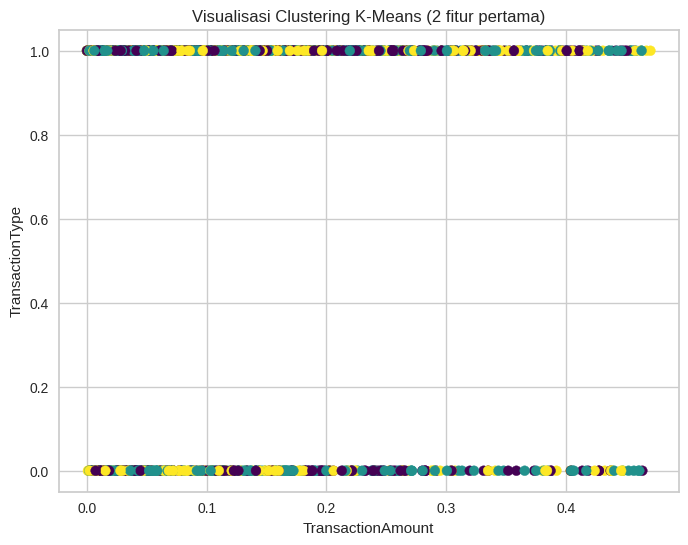

In [25]:
# Membuat visualisasi hasil clustering
plt.figure(figsize=(8,6))
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=labels, cmap='viridis', s=50)
plt.title("Visualisasi Clustering K-Means (2 fitur pertama)")
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.show()

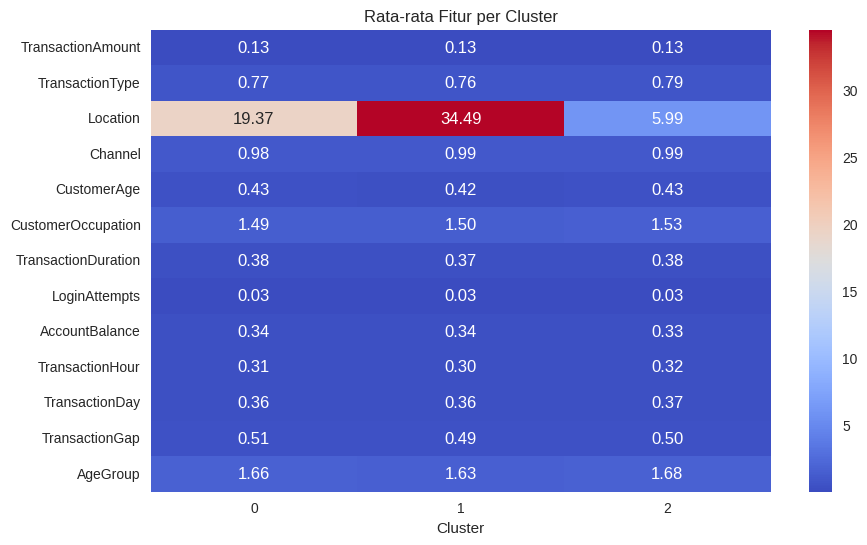

In [26]:
cluster_means = df.groupby("Cluster").mean()
plt.figure(figsize=(10,6))
sns.heatmap(cluster_means.T, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Rata-rata Fitur per Cluster")
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

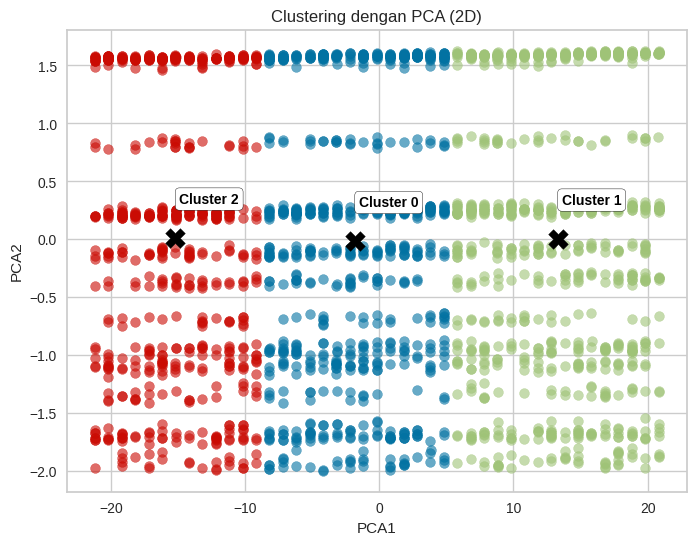

In [27]:
# Membangun model menggunakan PCA.
pca =PCA(n_components=2)
pca_data = pca.fit_transform(df.drop(columns=["Cluster"], errors='ignore'))
# Menyimpan data PCA sebagai Dataframe dengan nama PCA_<numbers>
PCA_df = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2'])
# Pastikan kamu membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.
model_pca_kmeans = KMeans(n_clusters=3, random_state=42)
model_pca_kmeans.fit(PCA_df)

# Replace kolom Cluster dengan hasil PCA
df["Cluster"] = model_pca_kmeans.labels_

# Plot hasil clustering
plt.figure(figsize=(8,6))
for cluster_id in np.unique(labels):
    cluster_points = PCA_df[labels == cluster_id]
    plt.scatter(
        cluster_points['PCA1'], cluster_points['PCA2'],
        s=50, alpha=0.6,
        label=f'Cluster {cluster_id}'
    )

# Tambahkan centroid
centroids = model_pca_kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0], centroids[:, 1],
    c='black', s=200, marker='X', label='Centroid'
)

# Tambahkan teks di luar titik centroid
for i, (x, y) in enumerate(centroids):
    plt.text(
        x + 0.3, y + 0.3,
        f'Cluster {i}', fontsize=10,
        fontweight='bold', color='black',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
    )

plt.title("Clustering dengan PCA (2D)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

In [28]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
joblib.dump(model_pca_kmeans, "PCA_model_clustering.h5")


['PCA_model_clustering.h5']

In [29]:
score_pca = silhouette_score(PCA_df, model_pca_kmeans.labels_)
print("Silhouette Score (PCA KMeans):", round(score_pca, 2))

Silhouette Score (PCA KMeans): 0.56


# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [30]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.
def ringkasan_cluster(df, group_name, decimals=4):
    """
    Membuat ringkasan clustering berdasarkan group fitur.
    """
    grouping = {
        "Transaksi": [
            "TransactionAmount", "TransactionType",
            "TransactionDuration", "TransactionHour", "TransactionDay"
        ],
        "Nasabah": [
            "CustomerAge", "AgeGroup", "CustomerOccupation"
        ],
        "Akun_Keamanan": [
            "AccountBalance", "LoginAttempts", "TransactionGap"
        ],
        "Lokasi_Channel": [
            "Location", "Channel"
        ]
    }

    if group_name not in grouping:
        print(f"❌ Group '{group_name}' tidak ditemukan. Pilih salah satu: {list(grouping.keys())}")
        return

    cols = grouping[group_name]
    print(f"📊 Ringkasan Fitur {group_name}")
    summary = df[cols + ["Cluster"]].groupby("Cluster").agg(
        ["min", "max", "mean"]
    )
    display(summary.round(decimals))


In [31]:
ringkasan_cluster(df, "Transaksi")

📊 Ringkasan Fitur Transaksi


TransactionAmount                 TransactionType              \
                      min     max    mean             min max    mean   
Cluster                                                                 
0                  0.0001  0.4638  0.1339               0   1  0.7685   
1                  0.0000  0.4632  0.1326               0   1  0.7625   
2                  0.0000  0.4706  0.1312               0   1  0.7912   

        TransactionDuration                 TransactionHour               \
                        min     max    mean             min  max    mean   
Cluster                                                                    
0                       0.0  0.9966  0.3847             0.0  1.0  0.3096   
1                       0.0  0.9966  0.3723             0.0  1.0  0.3025   
2                       0.0  1.0000  0.3787             0.0  1.0  0.3222   

        TransactionDay               
                   min  max    mean  
Cluster                              
0                  0.0  1.0  0.3634  
1                  0.0  1.0  0.3631  
2                  0.0  1.0  0.3748

In [32]:
ringkasan_cluster(df, "Nasabah")

📊 Ringkasan Fitur Nasabah


CustomerAge              AgeGroup             CustomerOccupation      \
                min  max    mean      min max    mean                min max   
Cluster                                                                        
0               0.0  1.0  0.4346        0   3  1.6589                  0   3   
1               0.0  1.0  0.4241        0   3  1.6300                  0   3   
2               0.0  1.0  0.4335        0   3  1.6819                  0   3   

                 
           mean  
Cluster          
0        1.4904  
1        1.5025  
2        1.5302

In [33]:
ringkasan_cluster(df, "Akun_Keamanan")

📊 Ringkasan Fitur Akun_Keamanan


AccountBalance                 LoginAttempts               \
                   min     max    mean           min  max    mean   
Cluster                                                             
0               0.0008  0.9976  0.3383           0.0  1.0  0.0349   
1               0.0001  1.0000  0.3436           0.0  1.0  0.0266   
2               0.0011  0.9971  0.3321           0.0  1.0  0.0302   

        TransactionGap               
                   min  max    mean  
Cluster                              
0                  0.0  1.0  0.5098  
1                  0.0  1.0  0.4892  
2                  0.0  1.0  0.4983

In [34]:
ringkasan_cluster(df, "Lokasi_Channel")

📊 Ringkasan Fitur Lokasi_Channel


Location              Channel            
             min max     mean     min max    mean
Cluster                                          
0             13  26  19.3712       0   2  0.9767
1             27  42  34.4938       0   2  0.9888
2              0  12   5.9918       0   2  0.9869

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.

1. **Cluster 0: (Nasabah Transaksi Rendah–Sedang, Aktivitas Stabil)**
  - **Rata-rata (mean) TransactionAmount: 0.1339 (min–max: 0.0001–0.4638)**
  - **Rata-rata (mean) TransactionType: 0.7685 (min–max: 0–1)**
  - **Rata-rata (mean) TransactionDuration: 0.3847 (min–max: 0.0–0.9966)**
  - **Rata-rata (mean) TransactionHour: 0.3096 (min–max: 0.0–1.0)**
  - **Rata-rata (mean) TransactionDay: 0.3634 (min–max: 0.0–1.0)**
  - **Rata-rata (mean) CustomerAge: 0.4346 (min–max: 0.0–1.0)**
  - **Rata-rata (mean) AgeGroup: 1.6589 (min–max: 0–3)**
  - **Rata-rata (mean) CustomerOccupation: 1.4904 (min–max: 0–3)**
  - **Rata-rata (mean) AccountBalance: 0.3383 (min–max: 0.0008–0.9976)**
  - **Rata-rata (mean) LoginAttempts: 0.0349 (min–max: 0.0–1.0)**
  - **Rata-rata (mean) TransactionGap: 0.5098 (min–max: 0.0–1.0)**
  - **Rata-rata (mean) Location: 19.3712 (min–max: 13–26)**
  - **Rata-rata (mean) Channel: 0.9767 (min–max: 0–2)**
  - **Analisis:** Cluster ini berisi nasabah dengan transaksi bernilai kecil hingga sedang dan aktivitas login yang rendah. Saldo akun relatif stabil, serta transaksi cenderung dilakukan pada lokasi menengah (wilayah 13–26). Mereka terlihat konsisten dalam pola transaksinya, tanpa lonjakan signifikan. Rekomendasi untuk cluster ini adalah menawarkan program loyalitas untuk transaksi rutin kecil, memberikan promosi berbasis frekuensi, serta edukasi digital agar lebih percaya diri bertransaksi online.



2. **Cluster 1: (Nasabah Aktivitas Online Rendah, Saldo Stabil)**
  - **Rata-rata (mean) TransactionAmount: 0.1326 (min–max: 0.0000–0.4632)**
  - **Rata-rata (mean) TransactionType: 0.7625 (min–max: 0–1)**
  - **Rata-rata (mean) TransactionDuration: 0.3723 (min–max: 0.0–0.9966)**
  - **Rata-rata (mean) TransactionHour: 0.3025 (min–max: 0.0–1.0)**
  - **Rata-rata (mean) TransactionDay: 0.3631 (min–max: 0.0–1.0)**
  - **Rata-rata (mean) CustomerAge: 0.4241 (min–max: 0.0–1.0)**
  - **Rata-rata (mean) AgeGroup: 1.6300 (min–max: 0–3)**
  - **Rata-rata (mean) CustomerOccupation: 1.5025 (min–max: 0–3)**
  - **Rata-rata (mean) AccountBalance: 0.3436 (min–max: 0.0001–1.0000)**
  - **Rata-rata (mean) LoginAttempts: 0.0266 (min–max: 0.0–1.0)**
  - **Rata-rata (mean) TransactionGap: 0.4892 (min–max: 0.0–1.0)**
  - **Rata-rata (mean) Location: 34.4938 (min–max: 27–42)**
  - **Rata-rata (mean) Channel: 0.9888 (min–max: 0–2)**
  - **Analisis:** Nasabah di cluster ini memiliki transaksi yang serupa dengan cluster 0 dari sisi nominal dan saldo, tetapi tingkat login lebih rendah. Transaksi mereka banyak dilakukan di lokasi menengah ke atas (wilayah 27–42). Pola ini menunjukkan preferensi transaksi offline atau cabang tertentu. Strategi yang cocok adalah meningkatkan literasi digital melalui edukasi penggunaan mobile/online banking, memberi insentif seperti voucher untuk transaksi online, serta mengedepankan keamanan akun agar tetap terjaga.


3. **Cluster 2: (Nasabah dengan Aktivitas Transaksi Sedang–Tinggi, Lokasi Tertentu)**
  - **Rata-rata (mean) TransactionAmount: 0.1312 (min–max: 0.0000–0.4706)**
  - **Rata-rata (mean) TransactionType: 0.7912 (min–max: 0–1)**
  - **Rata-rata (mean) TransactionDuration: 0.3787 (min–max: 0.0–1.0000)**
  - **Rata-rata (mean) TransactionHour: 0.3222 (min–max: 0.0–1.0)**
  - **Rata-rata (mean) TransactionDay: 0.3748 (min–max: 0.0–1.0)**
  - **Rata-rata (mean) CustomerAge: 0.4335 (min–max: 0.0–1.0)**
  - **Rata-rata (mean) AgeGroup: 1.6819 (min–max: 0–3)**
  - **Rata-rata (mean) CustomerOccupation: 1.5302 (min–max: 0–3)**
  - **Rata-rata (mean) AccountBalance: 0.3321 (min–max: 0.0011–0.9971)**
  - **Rata-rata (mean) LoginAttempts: 0.0302 (min–max: 0.0–1.0)**
  - **Rata-rata (mean) TransactionGap: 0.4983 (min–max: 0.0–1.0)**
  - **Rata-rata (mean) Location: 5.9918 (min–max: 0–12)**
  - **Rata-rata (mean) Channel: 0.9869 (min–max: 0–2)**
  - **Analisis:** Cluster ini terdiri dari nasabah yang memiliki aktivitas transaksi relatif lebih intensif dibanding cluster lain, dengan lokasi terbatas pada wilayah 0–12. Saldo akun berada pada level moderat, dan login tetap rendah. Pola ini menunjukkan bahwa mereka memiliki preferensi transaksi yang jelas di wilayah tertentu. Rekomendasi untuk cluster ini adalah membuat program promosi berbasis lokasi, menjalin kerja sama dengan merchant populer di area tersebut, serta menyediakan insentif untuk meningkatkan volume transaksi di kanal digital.


# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [35]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df = df.rename(columns={"Cluster": "Target"})
df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionHour,TransactionDay,TransactionGap,AgeGroup,Target
0,0.007207,1,36,0,0.838710,0,0.244828,0.0,0.336832,0.0,0.25,0.728022,1,1
1,0.195940,1,15,0,0.806452,0,0.451724,0.0,0.918055,0.0,0.25,0.516484,1,0
2,0.065680,1,23,2,0.016129,3,0.158621,0.0,0.068637,1.0,0.00,0.480769,2,0
3,0.096016,1,33,2,0.129032,3,0.051724,0.0,0.569198,0.0,1.00,0.662088,2,1
5,0.047888,1,28,0,0.000000,3,0.558621,0.0,0.045738,0.5,0.00,0.750000,2,1


In [36]:
# Simpan Data
df.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [37]:
# inverse dataset ke rentang normal untuk numerikal
df_inverse = df.copy()
df_inverse[num_cols] = scaler.inverse_transform(df_inverse[num_cols])
# tampilkan dataset yang sudah di-inverse
df_inverse.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionHour,TransactionDay,TransactionGap,AgeGroup,Target
0,14.09,1,36,0,70.0,0,81.0,1.0,5112.21,16.0,1.0,572.0,1,1
1,376.24,1,15,0,68.0,0,141.0,1.0,13758.91,16.0,1.0,495.0,1,0
2,126.29,1,23,2,19.0,3,56.0,1.0,1122.35,18.0,0.0,482.0,2,0
3,184.50,1,33,2,26.0,3,25.0,1.0,8569.06,16.0,4.0,548.0,2,1
5,92.15,1,28,0,18.0,3,172.0,1.0,781.68,17.0,0.0,580.0,2,1


In [38]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)
# Simpan encoder per kolom
for col, encoder in encoders.items():
    if col in df_inverse.columns and col != "AgeGroup":  # skip AgeGroup (hasil binning manual)
        df_inverse[col] = encoder.inverse_transform(df_inverse[col].astype(int))

# Inverse khusus AgeGroup
df_inverse["AgeGroup"] = le_age.inverse_transform(df_inverse["AgeGroup"].astype(int))

# tampilkan dataset yang sudah di-inverse
df_inverse.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionHour,TransactionDay,TransactionGap,AgeGroup,Target
0,14.09,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,16.0,1.0,572.0,Lansia,1
1,376.24,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,16.0,1.0,495.0,Lansia,0
2,126.29,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,18.0,0.0,482.0,Muda,0
3,184.50,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,16.0,4.0,548.0,Muda,1
5,92.15,Debit,Oklahoma City,ATM,18.0,Student,172.0,1.0,781.68,17.0,0.0,580.0,Muda,1


In [39]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.
def summary_group(df, group_cols, group_name='Group'):
    """
    Menghasilkan ringkasan deskriptif per cluster untuk grup kolom tertentu.
    Output dengan MultiIndex kolom: fitur -> min, max, mean (numerik) atau mode (kategorikal)
    """
    # Pilih kolom numerik dan kategorikal
    numerical_cols = df[group_cols].select_dtypes(include=['float64','int64']).columns.tolist()
    categorical_cols = [col for col in group_cols if col not in numerical_cols]

    summary_df = pd.DataFrame()

    # Agregasi numerik: min, max, mean
    for col in numerical_cols:
        temp = df.groupby('Target')[col].agg(['min','max','mean']).round(4)
        temp.columns = pd.MultiIndex.from_product([[col], ['min','max','mean']])
        summary_df = pd.concat([summary_df, temp], axis=1)

    # Agregasi kategorikal: mode
    for col in categorical_cols:
        mode_temp = df.groupby('Target')[col].agg(lambda x: x.mode()[0])
        mode_temp = mode_temp.to_frame()
        mode_temp.columns = pd.MultiIndex.from_product([[col], ['mode']])
        summary_df = pd.concat([summary_df, mode_temp], axis=1)

    summary_df.index.name = 'Cluster'
    return summary_df


In [40]:
# Grup 1: Informasi Transaksi
transaksi_cols = ['TransactionAmount', 'TransactionDuration', 'TransactionHour', 'TransactionDay', 'TransactionGap']
summary_transaksi = summary_group(df_inverse, transaksi_cols, group_name='Transaksi')
summary_transaksi

TransactionAmount                   TransactionDuration         \
                      min     max      mean                 min    max   
Cluster                                                                  
0                    0.45  890.24  257.1753                10.0  299.0   
1                    0.26  889.01  254.6975                10.0  299.0   
2                    0.32  903.19  252.0736                10.0  300.0   

                  TransactionHour                TransactionDay               \
             mean             min   max     mean            min  max    mean   
Cluster                                                                        
0        121.5740            16.0  18.0  16.6192            0.0  4.0  1.4534   
1        117.9550            16.0  18.0  16.6050            0.0  4.0  1.4525   
2        119.8206            16.0  18.0  16.6444            0.0  4.0  1.4992   

        TransactionGap                   
                   min    max      mean  
Cluster                                  
0                307.0  671.0  492.5712  
1                307.0  671.0  485.0538  
2                307.0  671.0  488.3687

In [41]:
# Grup 2: Informasi Nasabah
nasabah_cols = ['CustomerAge', 'AgeGroup', 'CustomerOccupation']
summary_nasabah = summary_group(df_inverse, nasabah_cols, group_name='Nasabah')
summary_nasabah

CustomerAge                AgeGroup CustomerOccupation
                min   max     mean     mode               mode
Cluster                                                       
0              18.0  80.0  44.9438     Muda           Engineer
1              18.0  80.0  44.2938     Muda            Student
2              18.0  80.0  44.8744     Muda            Student

In [42]:
# Grup 3: Informasi Akun & Login
akun_cols = ['AccountBalance', 'LoginAttempts']
summary_akun = summary_group(df_inverse, akun_cols, group_name='Akun_Login')
summary_akun

AccountBalance                      LoginAttempts             
                   min       max       mean           min  max    mean
Cluster                                                               
0               112.76  14942.78  5133.4718           1.0  5.0  1.1397
1               102.20  14977.99  5213.2385           1.0  5.0  1.1062
2               117.98  14935.50  5042.0952           1.0  5.0  1.1207

In [43]:
# Grup 4: Kanal & Lokasi
kanal_cols = ['Location', 'Channel', 'TransactionType']
summary_kanal = summary_group(df_inverse, kanal_cols, group_name='Kanal_Lokasi')
summary_kanal

,Location,Channel,TransactionType
,mode,mode,mode
Cluster,,,
0,Fort Worth,Branch,Debit
1,Oklahoma City,Branch,Debit
2,Charlotte,Branch,Debit


## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.

1. **Cluster 0: (Nasabah Muda dengan Transaksi Reguler, Lokasi Fort Worth)**
  - **Rata-rata (mean) TransactionAmount: 257.1753 (min–max: 0.45–890.24)**
  - **Rata-rata (mean) TransactionDuration: 121.5740 (min–max: 10.0–299.0)**
  - **Rata-rata (mean) TransactionHour: 16.6192 (min–max: 16.0–18.0)**
  - **Rata-rata (mean) TransactionDay: 1.4534 (min–max: 0.0–4.0)**
  - **Rata-rata (mean) TransactionGap: 492.5712 (min–max: 307.0–671.0)**
  - **Rata-rata (mean) CustomerAge: 44.9438 (min–max: 18.0–80.0)**
  - **Rata-rata (mode) AgeGroup: Muda**
  - **Rata-rata (mode) CustomerOccupation: Engineer**
  - **Rata-rata (mean) AccountBalance: 5133.4718 (min–max: 112.76–14942.78)**
  - **Rata-rata (mean) LoginAttempts: 1.1397 (min–max: 1.0–5.0)**
  - **Rata-rata (mode) Location: Fort Worth**
  - **Rata-rata (mode) Channel: Branch**
  - **Rata-rata (mode) TransactionType: Debit**
  - **Analisis:** Cluster ini berisi nasabah muda dengan pekerjaan dominan Engineer, melakukan transaksi reguler dengan nominal moderat dan stabil. Mereka cenderung menggunakan cabang (Branch) untuk transaksi debit. Dengan saldo yang cukup baik, mereka relatif stabil dalam pengelolaan keuangan. Rekomendasi untuk cluster ini adalah menawarkan produk tabungan premium atau kartu debit dengan fitur tambahan, serta program khusus untuk profesional muda agar lebih loyal.


2. **Cluster 1: (Nasabah Muda dengan Aktivitas Transaksi Reguler, Lokasi Oklahoma City)**
  - **Rata-rata (mean) TransactionAmount: 254.6975 (min–max: 0.26–889.01)**
  - **Rata-rata (mean) TransactionDuration: 117.9550 (min–max: 10.0–299.0)**
  - **Rata-rata (mean) TransactionHour: 16.6050 (min–max: 16.0–18.0)**
  - **Rata-rata (mean) TransactionDay: 1.4525 (min–max: 0.0–4.0)**
  - **Rata-rata (mean) TransactionGap: 485.0538 (min–max: 307.0–671.0)**
  - **Rata-rata (mean) CustomerAge: 44.2938 (min–max: 18.0–80.0)**
  - **Rata-rata (mode) AgeGroup: Muda**
  - **Rata-rata (mode) CustomerOccupation: Student**
  - **Rata-rata (mean) AccountBalance: 5213.2385 (min–max: 102.20–14977.99)**
  - **Rata-rata (mean) LoginAttempts: 1.1062 (min–max: 1.0–5.0)**
  - **Rata-rata (mode) Location: Oklahoma City**
  - **Rata-rata (mode) Channel: Branch**
  - **Rata-rata (mode) TransactionType: Debit**
  - **Analisis:** Cluster ini mirip dengan Cluster 0 dari sisi pola transaksi, namun nasabah di sini lebih banyak berasal dari kelompok Student dengan saldo sedikit lebih tinggi. Mereka tetap lebih sering menggunakan Branch sebagai kanal utama. Rekomendasi untuk cluster ini adalah membuat program loyalitas untuk transaksi rutin, memberikan promo debit untuk pelajar/mahasiswa, serta mendorong mereka mencoba layanan digital banking agar lebih terbiasa dengan transaksi online.


3. **Cluster 2: (Nasabah Muda dengan Transaksi Aktif, Lokasi Charlotte)**
  - **Rata-rata (mean) TransactionAmount: 252.0736 (min–max: 0.32–903.19)**
  - **Rata-rata (mean) TransactionDuration: 119.8206 (min–max: 10.0–300.0)**
  - **Rata-rata (mean) TransactionHour: 16.6444 (min–max: 16.0–18.0)**
  - **Rata-rata (mean) TransactionDay: 1.4992 (min–max: 0.0–4.0)**
  - **Rata-rata (mean) TransactionGap: 488.3687 (min–max: 307.0–671.0)**
  - **Rata-rata (mean) CustomerAge: 44.8744 (min–max: 18.0–80.0)**
  - **Rata-rata (mode) AgeGroup: Muda**
  - **Rata-rata (mode) CustomerOccupation: Student**
  - **Rata-rata (mean) AccountBalance: 5042.0952 (min–max: 117.98–14935.50)**
  - **Rata-rata (mean) LoginAttempts: 1.1207 (min–max: 1.0–5.0)**
  - **Rata-rata (mode) Location: Charlotte**
  - **Rata-rata (mode) Channel: Branch**
  - **Rata-rata (mode) TransactionType: Debit**
  - **Analisis:** Cluster ini terdiri dari nasabah muda dengan mayoritas Student, memiliki transaksi aktif dengan variasi nilai lebih besar. Durasi transaksi sedikit lebih panjang dibanding cluster lain, dan saldo akun berada di tingkat moderat. Mereka tetap lebih memilih Branch sebagai kanal utama. Rekomendasi untuk cluster ini adalah mendorong penggunaan layanan digital banking melalui kampanye edukasi, menyediakan promo berbasis merchant favorit di Charlotte, serta memberikan fitur digital interaktif agar keterlibatan nasabah semakin meningkat.

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [44]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
df_inverse.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionHour,TransactionDay,TransactionGap,AgeGroup,Target
0,14.09,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,16.0,1.0,572.0,Lansia,1
1,376.24,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,16.0,1.0,495.0,Lansia,0
2,126.29,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,18.0,0.0,482.0,Muda,0
3,184.50,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,16.0,4.0,548.0,Muda,1
5,92.15,Debit,Oklahoma City,ATM,18.0,Student,172.0,1.0,781.68,17.0,0.0,580.0,Muda,1


In [45]:
# Simpan Data
df_inverse.to_csv('data_clustering_inverse.csv', index=False)

End of Code.